현대 자동차 데이터를 이용

가격:1135 
년식:2015
연비: 15
마력:100
토크:13.6
연료:가솔린
하이브리드:0
배기량:1368
중량:1035
변속기:수동

인경우 종류( 준중형, 소형, 대형)
를 예측하시요.
 KNN, decision tree, naive_bayes, svc 
각각의 모델에 대해 
1. f1 score(train, test) , confusion matrix,
를 구하시요

2. 각모델별 train ,test f1 를  bar 그래프로 그리고
가장높은 f1 score 의 모델을 확인하시요.

In [1]:
from sklearn.datasets import make_classification

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score, cross_validate
import multiprocessing


from sklearn.datasets import load_boston, load_breast_cancer,load_iris
from sklearn.datasets import load_wine
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC #SVM
from sklearn import metrics
from sklearn.datasets import make_classification, load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz,export_text, plot_tree
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.compose import make_column_transformer
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve


import matplotlib
matplotlib.rcParams["font.family"]="Malgun Gothic"
matplotlib.rcParams["axes.unicode_minus"]= False

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('hyundaiCar.xlsx')
df

,가격,년식,종류,연비,마력,토크,연료,하이브리드,배기량,중량,변속기
0,1885,2015,준중형,11.8,172,21.0,가솔린,0,1999,1300,자동
1,2190,2015,준중형,12.3,204,27.0,가솔린,0,1591,1300,자동
2,1135,2015,소형,15.0,100,13.6,가솔린,0,1368,1035,수동
3,1645,2014,소형,14.0,140,17.0,가솔린,0,1591,1090,자동
4,1960,2015,대형,9.6,175,46.0,디젤,0,2497,1990,자동
...,...,...,...,...,...,...,...,...,...,...,...
66,3802,2015,중형,8.5,290,34.8,가솔린,0,3342,1901,자동
67,1270,2012,소형,13.3,108,13.9,가솔린,0,1396,1040,자동
68,2430,2015,준중형,12.8,186,41.0,디젤,0,1995,1665,자동
69,2870,2015,중형,17.7,156,19.3,가솔린,1,1999,1585,자동


In [3]:
x_data = df.drop(['종류'], axis='columns')
y_data = df['종류']
x_data = pd.get_dummies(x_data, columns=['연료','변속기'])
y_data.unique()

array(['준중형', '소형', '대형', '중형'], dtype=object)

In [4]:
x_train, x_test, y_train, y_test = train_test_split( x_data, 
                           y_data,  test_size=0.2,  stratify=y_data, random_state=1)

### KNN

In [5]:
# 모델 생성 및 학습
param_grid = {'n_neighbors':[1, 2, 3, 4, 5]}
grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, scoring='f1_macro')
grid.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5]}, scoring='f1_macro')

In [6]:
grid.best_params_

{'n_neighbors': 1}

In [7]:
grid.best_score_

0.8270238095238096

In [8]:
xd = np.array([[1135,2015,15,100,13.6,0,1368,1035,0,1,0,1,0]])
xdataF = pd.DataFrame( xd, columns=x_test.columns)
grid.best_estimator_.predict(xdataF)

array(['소형'], dtype=object)

In [9]:
# test, train score
# f1-score
print(grid.score(x_train, y_train))
print(grid.score(x_test, y_test))

# test f1-score
y_pred = grid.best_estimator_.predict(x_train)
print('train f1-score:', f1_score(y_train,y_pred, average='macro'))
# train f1-score
y_pred = grid.best_estimator_.predict(x_test)
print('test f1-score:', f1_score(y_test,y_pred, average='macro'))


1.0
0.9142857142857144
train f1-score: 1.0
test f1-score: 0.9142857142857144


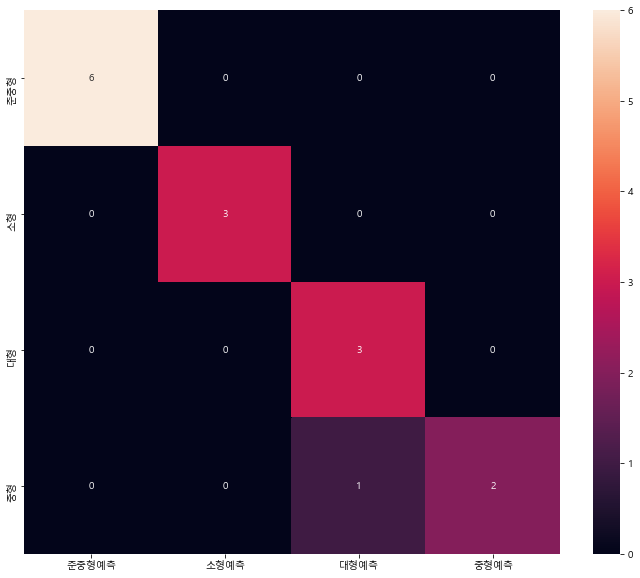

In [10]:
cm_train = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,10))
sns.heatmap(cm_train, annot = True,fmt='d',yticklabels = ['준중형', '소형', '대형', '중형'], xticklabels = ['준중형예측', '소형예측', '대형예측', '중형예측'])
plt.show()

### decision tree

In [11]:
# 모델 생성 및 학습

model_tree = make_pipeline(StandardScaler(), DecisionTreeClassifier(criterion="entropy"))
model_tree.fit( x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(criterion='entropy'))])

In [12]:
xd = np.array([[1135,2015,15,100,13.6,0,1368,1035,0,1,0,1,0]])
xdataF = pd.DataFrame( xd, columns=x_test.columns)
model_tree.predict(xdataF)

array(['소형'], dtype=object)

In [13]:
# test, train score

print(model_tree.score(x_train, y_train))
print(model_tree.score(x_test, y_test))

# f1-score (train)
y_pred = grid.predict(x_train)
print('train f1-score:', f1_score(y_train,y_pred, average='macro'))

# f1-score (test)
y_pred = model_tree.predict(x_test)
print('test f1-score:', f1_score(y_test,y_pred, average='macro'))

1.0
0.8666666666666667
train f1-score: 1.0
test f1-score: 0.8875


In [ ]:
cm_train = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,10))
sns.heatmap(cm_train, annot = True,fmt='d',yticklabels = ['준중형', '소형', '대형', '중형'], xticklabels = ['준중형예측', '소형예측', '대형예측', '중형예측'])
plt.show()

### naive_bayes

In [17]:
model = make_pipeline(StandardScaler(), BernoulliNB())
model.fit(x_data, y_data)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('bernoullinb', BernoulliNB())])

In [18]:
xd = np.array([[1135,2015,15,100,13.6,0,1368,1035,0,1,0,1,0]])
xdataF = pd.DataFrame( xd, columns=x_test.columns)
model.predict(xdataF)

array(['소형'], dtype='<U3')

In [19]:
# test, train score

print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

# f1-score (train)
y_pred = model.predict(x_train)
print('train f1-score:', f1_score(y_train,y_pred, average='macro'))

# f1-score (test)
y_pred = model.predict(x_test)
print('test f1-score:', f1_score(y_test,y_pred, average='macro'))

0.7857142857142857
0.8666666666666667
train f1-score: 0.764569804623829
test f1-score: 0.875


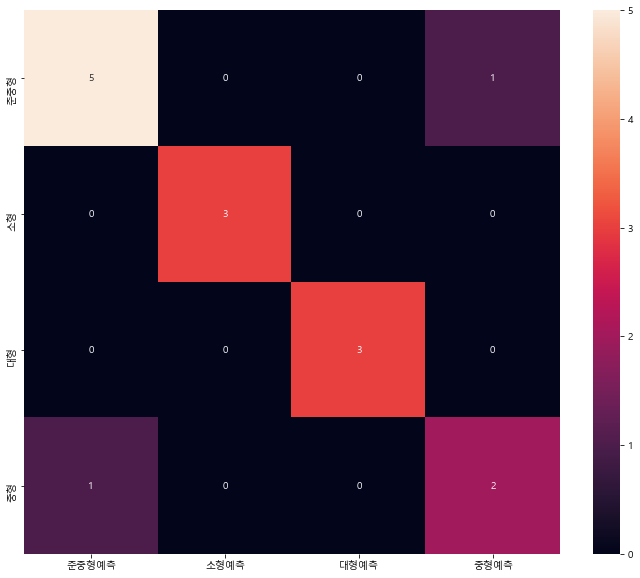

In [20]:
cm_train = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,10))
sns.heatmap(cm_train, annot = True,fmt='d',yticklabels = ['준중형', '소형', '대형', '중형'], xticklabels = ['준중형예측', '소형예측', '대형예측', '중형예측'])
plt.show()

### SVC

In [21]:
model = make_pipeline(StandardScaler(), SVC())
model.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [22]:
xd = np.array([[1135,2015,15,100,13.6,0,1368,1035,0,1,0,1,0]])
xdataF = pd.DataFrame( xd, columns=x_test.columns)
model.predict(xdataF)

array(['소형'], dtype=object)

In [23]:
# test, train score

print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

# f1-score (train)
y_pred = model.predict(x_train)
print('train f1-score:', f1_score(y_train,y_pred, average='macro'))

# f1-score (test)
y_pred = model.predict(x_test)
print('test f1-score:', f1_score(y_test,y_pred, average='macro'))

0.8571428571428571
0.8666666666666667
train f1-score: 0.8374765478424016
test f1-score: 0.8647727272727272


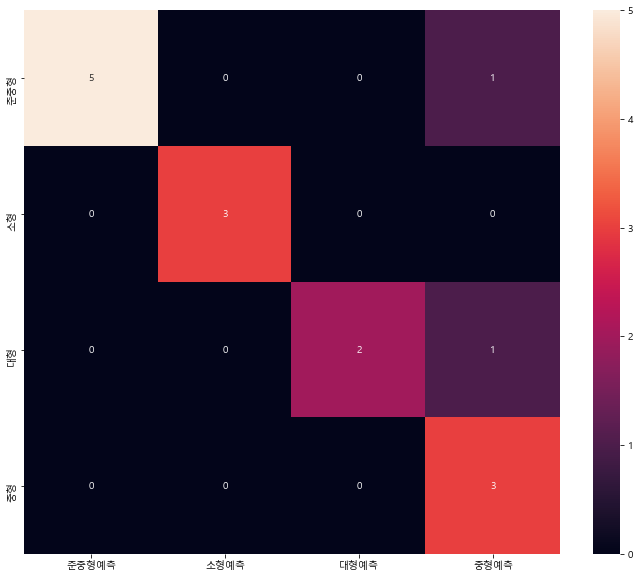

In [24]:
cm_train = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,10))
sns.heatmap(cm_train, annot = True,fmt='d',yticklabels = ['준중형', '소형', '대형', '중형'], xticklabels = ['준중형예측', '소형예측', '대형예측', '중형예측'])
plt.show()

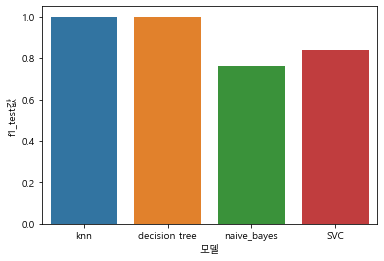

1.0


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
df = pd.DataFrame([
        ['knn',1.0, 0.9142857142857144],
        ['decision tree',1.0,  0.8875],
    ['naive_bayes',0.764569804623829,0.875],
    ['SVC',0.8374765478424016,0.8647727272727272]
    ], columns=['모델', 'f1_test값','f1_train값'])


sns.barplot(data=df, x='모델',y='f1_test값')
plt.show()

print(df['f1_test값'].max())

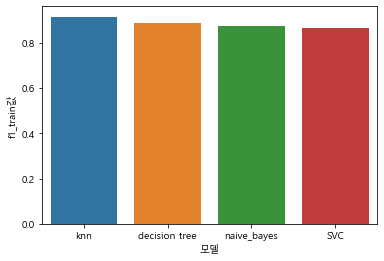

0.9142857142857144


In [16]:
sns.barplot(data=df, x='모델',y='f1_train값')
plt.show()
print(df['f1_train값'].max())